In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


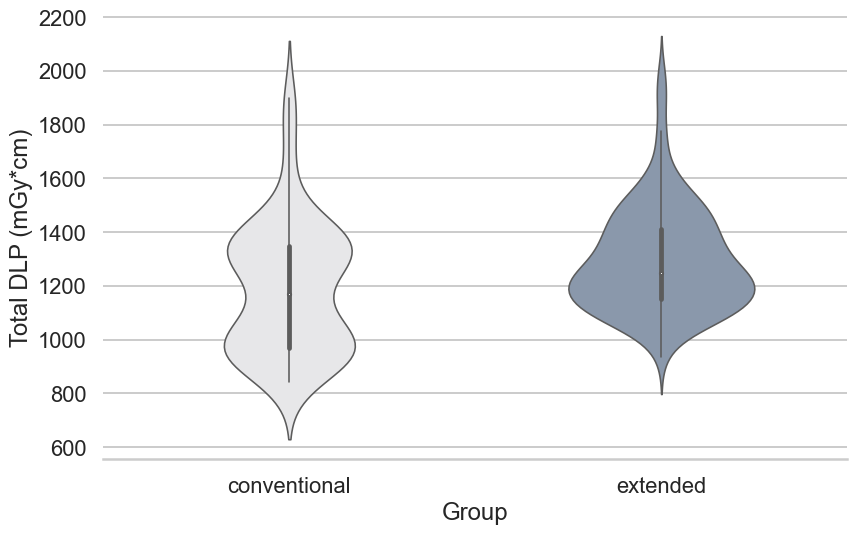

In [4]:
dlp_df = pd.read_excel("dlp.xlsx")
dlp_df = dlp_df[dlp_df['extended'] < 2100]
dlp_df = dlp_df[dlp_df['extended'] > 850]

all_df = dlp_df[['conventional', 'extended']]
df_melt = pd.melt(all_df.reset_index(), id_vars=['index'], value_vars=['conventional', 'extended'])
df_melt.columns = ['index', 'Group', 'Total DLP (mGy*cm)']
# df_melt.head()

sns.set_theme(rc={"figure.dpi": 96}, style='whitegrid', context='talk')
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.violinplot(x='Group', y='Total DLP (mGy*cm)', data=df_melt, 
                flierprops={'marker':'x'}, 
                palette=["#e7e7e9", "#8497b0"], 
                linewidth=1.2,
                width=0.5)
sns.despine(left=True)
plt.show()

In [3]:
print(f"conv: {round(dlp_df['conventional'].mean(),2)} ± {round(dlp_df['conventional'].std(),2)}")
print(f"ext: {round(dlp_df['extended'].mean(),2)} ± {round(dlp_df['extended'].std(),2)}")

conv: 1191.6 ± 241.94
ext: 1294.58 ± 192.34


In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Total_DLP ~ C(Group)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Group),5.648085e+05,1.0,12.447746,0.000502
Residual,1.075372e+07,237.0,NaN,NaN


In [23]:
from bioinfokit.analys import stat

res = stat()
res.tukey_hsd(df=df_melt, res_var='Total_DLP', xfac_var='Group', anova_model='Total_DLP ~ C(Group)')
res.tukey_summary

/usr/local/lib/python3.10/site-packages/bioinfokit/analys.py:402: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,conventional,extended,112.110797,49.510902,174.710692,4.989538,0.001


In [32]:
import statsmodels.stats.multicomp as mc
import scipy.stats as stats

comp = mc.MultiComparison(df_melt['Total_DLP'], df_melt['Group'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl

group1,group2,stat,pval,pval_corr,reject
conventional,extended,nan,nan,nan,False


In [69]:
vips = pd.read_excel('vips.xlsx')
vips.iloc[:12,]

,Feature,Importance
0,LAA morphology,0.505255
1,TropT,0.129024
2,CHA2DS2-VASc,0.054485
3,WBC count,0.054026
4,E/A ratio,0.051813
5,APTI,0.044292
6,Tricusp. insuff,0.042853
7,ESD,0.029542
8,EDD,0.026240
9,HgbA1c,0.025460


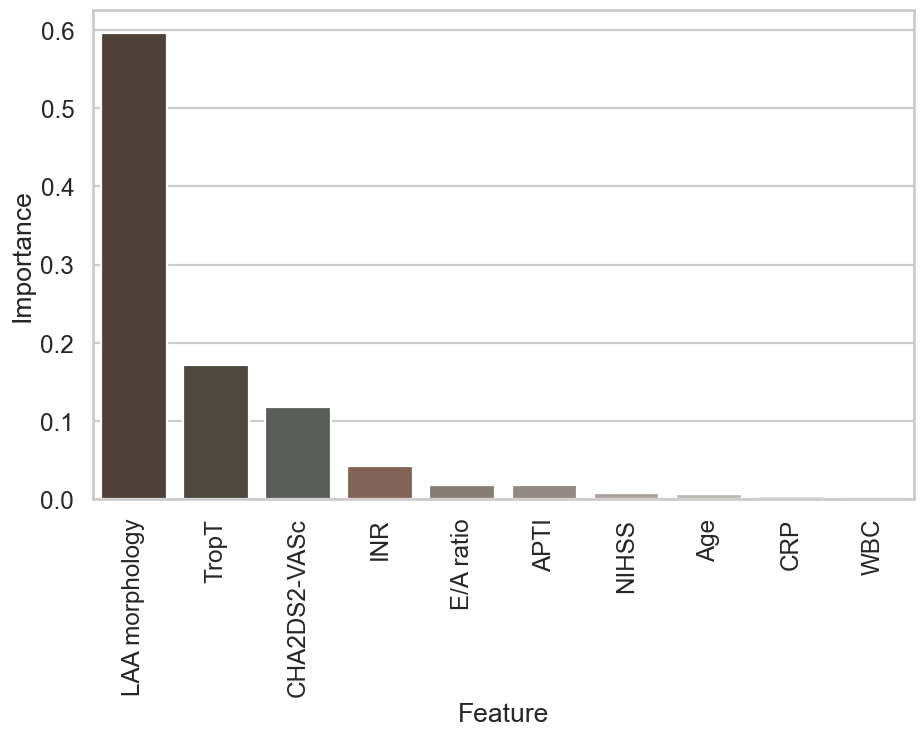

In [52]:
vips = pd.read_excel('vips.xlsx')
sns.set_theme(rc={"figure.dpi": 106}, style='whitegrid', context='talk')
fig, ax = plt.subplots(figsize=(10, 6))
ax=sns.barplot(data=vips.iloc[:12,], x='Feature', y='Importance', palette=['#504036', '#4e493c', '#585f58', '#896050', '#897c74', '#968881', '#aea39c', '#bbbcb1', '#d7d7c9', '#edede9'])
ax.tick_params(axis='x', rotation=90)
plt.show()

In [29]:
cta_df = pd.read_excel("Stroke_CTA_v4.xlsx")
print(f"{round(cta_df['Age'].mean(),2)} ± {round(cta_df['Age'].std(),2)}")

71.28 ± 11.88
